The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [265]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np

# Start coding here!

1. Most common gender and birth country

In [266]:
# Load the dataset 
nobel_df=pd.read_csv('data/nobel.csv')
print(nobel_df.info())
#most common gender and birth country
print(nobel_df['sex'].mode())
print(nobel_df['birth_country'].mode())
top_gender = 'Male'
top_country = 'United States of America'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  1000 non-null   int64 
 1   category              1000 non-null   object
 2   prize                 1000 non-null   object
 3   motivation            912 non-null    object
 4   prize_share           1000 non-null   object
 5   laureate_id           1000 non-null   int64 
 6   laureate_type         1000 non-null   object
 7   full_name             1000 non-null   object
 8   birth_date            968 non-null    object
 9   birth_city            964 non-null    object
 10  birth_country         969 non-null    object
 11  sex                   970 non-null    object
 12  organization_name     736 non-null    object
 13  organization_city     735 non-null    object
 14  organization_country  735 non-null    object
 15  death_date            596 non-null    o

2. Decade highest ratio US-born winners 

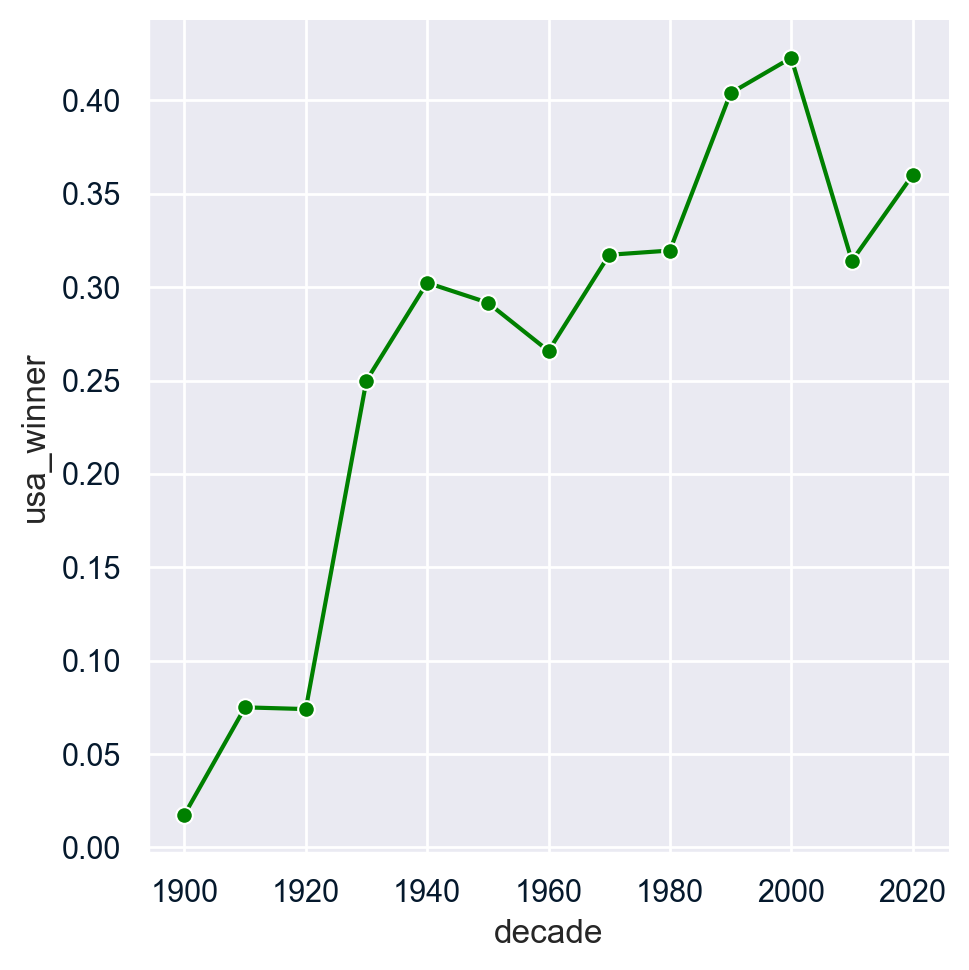

In [267]:
# usa born winners column
nobel_df['usa_winner']= nobel_df['birth_country']=='United States of America'

# Create the decade column
nobel_df['decade']= (np.floor(nobel_df['year']/10)*10).astype(int)

# Finding the ratio
ratio_usa=nobel_df.groupby('decade', as_index=False)['usa_winner'].agg('mean')

# Decade with the highest ratio of US-born winners
max_decade_usa_r = ratio_usa[ratio_usa['usa_winner']==ratio_usa['usa_winner'].max()]
max_decade_usa = max_decade_usa_r['decade'].values[0]

# Relational line plot
sns.set_context('notebook')
sns.relplot(data=ratio_usa, kind='line', x='decade',y='usa_winner',marker='o',color='g')

3. Decade and category with the highest proportion of female laureates

{2020: 'Literature'}


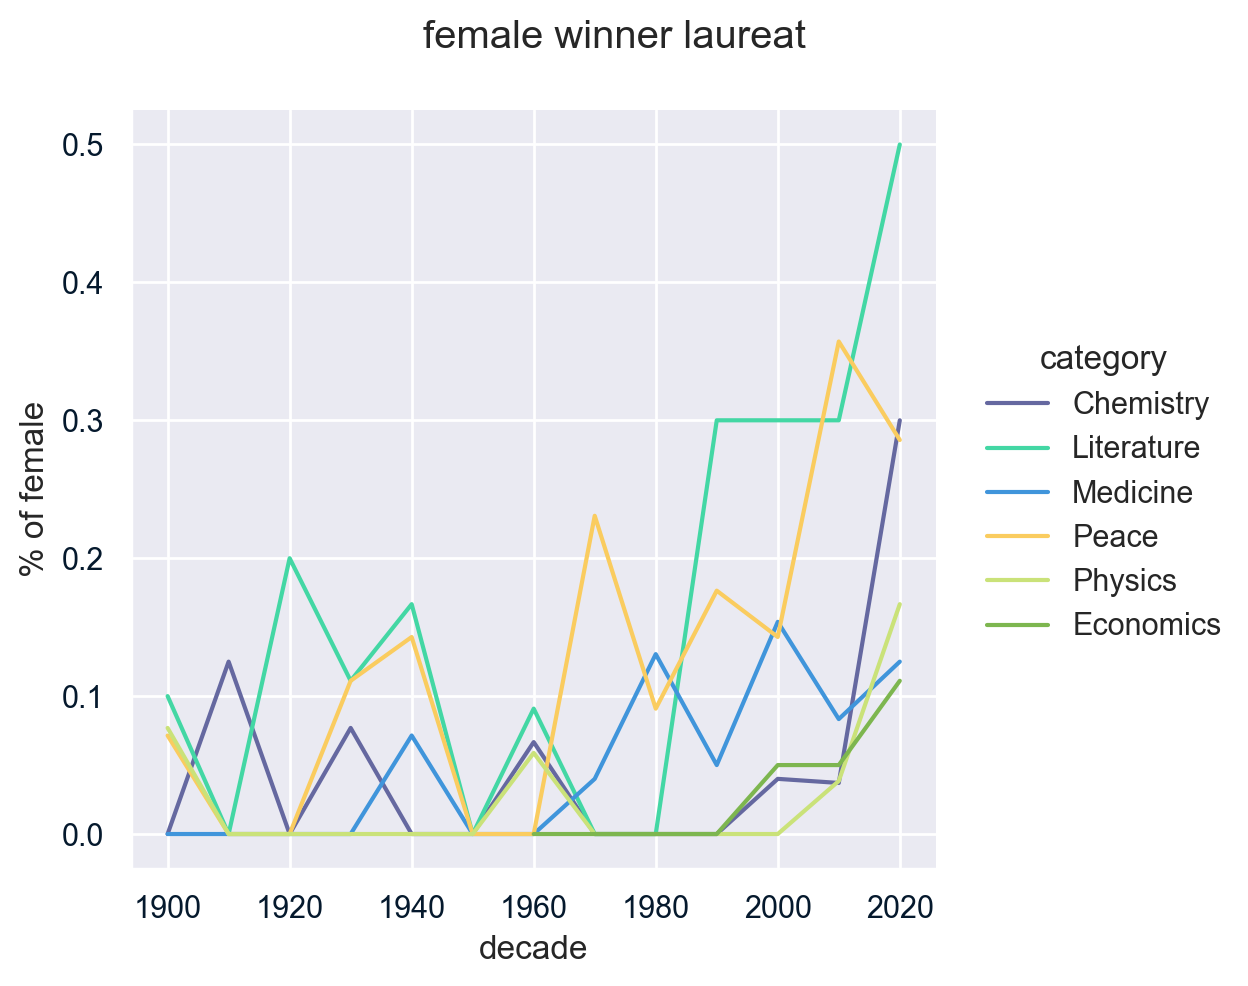

In [268]:
# filtering female winners by decade and category
nobel_df['female']=nobel_df['sex']=='Female'
female= nobel_df.groupby(['decade','category'],as_index=False)['female'].agg('mean')

# decade and category with the highest proportion of female laureates
highest_prop_f = female[female['female']==female['female'].max()]

# create a dictionary
max_female_dict = { highest_prop_f['decade'].values[0]:               highest_prop_f['category'].values[0]}

print(max_female_dict)

# relational line plot
sns.set_style('darkgrid')
g = sns.relplot(data=nobel_df, kind='line', x='decade', y='female',hue='category', ci=None)
g.set(ylabel='% of female')
g.fig.suptitle('female winner laureat')
g.tight_layout()

4. Find first woman to win a Nobel Prize

In [269]:
# first woman to win a Nobel Prize
first_f = nobel_df[(nobel_df['sex']=='Female') & (nobel_df['year'] == 
                    nobel_df['year']).min()].iloc[0]

first_woman = first_f[['year','category']]

first_woman_name = 'Marie Curie, née Sklodowska'
first_woman_category = 'Physics'
print(first_woman_name)
print(first_woman_category)

Marie Curie, née Sklodowska
Physics


5. Repeat winners

In [270]:
#Count the values in a column
multi_win = nobel_df['full_name'].value_counts()

#Finding counts of two or more
repeats = multi_win[multi_win>1].index

#Save as a list
repeat_list = list(repeats)


print(repeat_list)

['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']
